# <font color="#000000">Image Analysis using Machine Learning and Data Science</font>

**Charles Ajax Hulebak**

<div class="alert alert-block alert-info"><font color="#000000">
    
##  Introduction

This project includes performing machine learning algorithms for image recognition.  Utilizing a subset of over 10,000 images from Harvard's Dataverse, and also part of the Kaggle "Skin Cancer MNIST: HAM10000 analysis" competition.$^{1}$  

The subset of data used for this machine learning process includes the use of two types of skin conditions, including harmless melanoma and cancerous basel cell carcinoma.  The two types of skin conditions appear to have some similar characteristics, and the machine learning algorithm has been carefully tuned to provide the highest accuracy measurement possible, indicative of the ability to distinguish the difference between the skin cells.
</font></div>

<img src="02Content/01cover.jpg" width="400" align="center"/>

*Charles Ajax Hulebak ©2022*

<div class="alert alert-block alert-info"><font color="#000000">
The first step includes importing applicable python packages as required for the project:
<font><div>

In [1]:
#Import libraries

import pandas as pd # data processing, CSV file

import numpy as np # linear algebra

#Scikit-image package
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches

import skimage.io
from skimage import data
from skimage.io import imread
from skimage.io import imread_collection
from skimage.io import imshow

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
import re
import os
from os.path import join, exists, basename, normpath, split

import math
import random

#non-relative paths
import glob2
from glob2 import glob

import cv2
import imutils

from shutil import copyfile
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes=True)

skin_analysis = os.path.join('..', 'input')

## Project Background
Skin cancer is the most common type of cancer worldwide and affects every race and gender.
  
Some of these unfortunate statistics in the United States include:

* Each year nearly **5 million people are treated** for all skin cancers combined, with more than **9,500 people diagnosed with skin cancer every day**, and more than **two people dying every hour.** $^{2,3}$
* At least one in five Americans will develop skin cancer **by the age of 70.** $^{4}$
* Basal cell carcinoma (BCC) is the most common form of skin cancer. An estimated **4.3 million cases of BCC are diagnosed in the U.S. each year.** $^{5}$
* The **annual cost of treatment is estimated at 8.1 billion dollars**, with approximately 3.3 billion dollars associated with costs attributable to melanoma. $^{6}$
* **Globally, malignant skin melanoma has increased by 104.3%**, and non-melanoma skin cancer by 211.2% between 1990-2007, and 32.3% and 32.7% between 2007-2017.$^{7}$

The following statistics have been observed and statistically forecasted from the Centers for Disease Control and Prevention (CDC).$^{2}$

<img src="02Content/02.jpg" width="300" align="center"/>
<img src="02Content/03.jpg" width="300" align="center"/>

*Observed and projected age-adjusted melanoma incidence and mortality rates, by sex and race — United States, 1982–2030$^{1}$*

The use of technology, and specifically machine learning provides the ability to achieve these goals.  Machine Learning, deep learning and innovations with convolutional neural networks (CNNs) provide the ability to analyze imagery data, classify, and provide results from inputted data.  CNNs require large datasets in order to improve accuracy and provide sensible information.

The practical application of a machine learning program with a high success rate would provide the ability for increasing accurate results from early skin condition problems.  Images of skin conditions could be tested with a reliable model, compared and have a probable diagnosis.  A healthcare professional could take analyze the data, take this information into account, and treat conditions accordingly.   

This project has the ability to influence further development of an initiative to decrease the amount of time required for early analysis of skin conditions and guide healthcare professionals, while increasing the response time for more serious conditions, and reducing the time invested for treating less serious conditions.

**Convolutional Layer**

The image is passed over all of the spatial locations as it is passed along to the subsequent layer(s) toward the output.

In [3]:
# explicit call to HTML renderer for video file to specify layout
from IPython.display import display, HTML 
from base64 import b64encode
HTML("""
    <div align="middle">
        <video width="50%" controls>
            <source src="02Content/ConvLayerDgm.mp4" type="video/mp4">
        </video>
    </div>
""")

*Images recreated from Stanford CS230 course*

## Brief Overview - Deep Learning and Convolutional Neural Networks

A series of layers are introduced to create a hierarchical structure, in which each layer (controlled by tuning hyperparameters) introduces various filters and increases a level of complexity to analyze the data.  

Depending upon the data, and which layers are tested, accuracy may be determined from the test, training, and possible validation set (training and validation terminology may be interchanged).  The measurement of accuracy reflects the machine’s ability to learn from the data.

A series of epochs can test the data, while increasing the epochs allows the learning algorithm to run until errors have been minimized.

The accuracy of the model is tested and the hyperparameters are tuned for performance.

<img src="02Content/04CNNDiagram.png" width="700" align="center"/>

In [4]:
# explicit call to HTML renderer for video file to specify layout
HTML("""
    <div align="middle">
        <video width="50%" controls>
            <source src="02Content/CNN3DWalkthrough.mp4" type="video/mp4">
        </video>
    </div>
""")

## Dataset and Classification

Innovations and initiatives are taking place around the world to address a multitude of healthcare concerns using data science, machine learning, and technology. 

Kaggle, which is an online community that is focused toward machine learning project and programs introduced the HAM10000 competition a couple years ago.  Although the competition has concluded, there has still been activity with this project, as well as ability to utilize this data for analysis.

The dataset includes 10,000 images which contain seven categories of skin conditions.  Although the CNN is capable of classifying the accuracy between each of these types of conditions, this project will focus on two specific skin conditions, including  the melanocytic nevi, also called nevi (referred to as mole furthermore), and basal cell carcinoma, which is a form of cancerous cell.  

The physical appearance of these two types of skin conditions have many similarities, however the basal cell carcinoma requires immediate attention for clinical treatment.

## Clinical Characterization
### Mole characteristics$^{8}$

* **Size:** generally less than 5mm diameter, pigmented spots on the skin that usually appear between birth and childhood.  
* **Shape:** round or oval
* **Color:** brown is the most common; may be tan, black, red, pink, blue, skin-toned, or colorless
* **Characteristics:** flat or slightly raised

### Basal Cell Carcinoma characteristics $^{9}$
* **Size:** varies 
* **Shape:** varies
* **Color:** pink or red (most common); brown, black or flecks of these colors; yellowish; white; blue
* **Characteristics:** may be waxy, dip in the center, scaly patch of skin, sore that may bleed, ooze, or crust over

There are many similar characteristics, yet distinct differences.  How is a deep learning program going to distinguish between them?

<img src="02Content/05SkinCell.jpg" width="700" align="center"/>

## Project Walkthrough: Programming and Tuning the CNN

The initial steps for this project included downloading and reviewing both the metadata and image data for the project.

Following the analysis of the data and determination of the project objective, the intent is to compare two variables that have similar attributes.  These include the assessment of difference between two types of skin cells that are difficult to distinguish with the eye.

The original dataset included 6,705 mole images, and 514 basal cell carcinoma images.  Although this was sufficient for preliminary testing, I decided to create more basal cell carcinoma images by rotating and mirroring these images, to create 4,112 images.  Increasing this volume of data provides the ability to generate more accurate predictions for the testing and training data.  The new combined testing data is 10,817 images.

In addition, the image sizes were very large, amounting to over 2GB of data and initial testing.  The images were reduced from 650px x 450 px (300dpi) to 300px * 225px(200dpi.

In the next few sections we'll review the data, then proceed to the machine learning processes.

<div class="alert alert-block alert-info"><font color="#000000">
Similar characteristics that are difficult to distinguish without further scientific and medical investigation
<font><div>

<div class="alert alert-block alert-info"><font color="#000000">
Import files and review statistical information:
<font><div>

In [2]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(skin_analysis, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic Nevi',
    'mel': 'Dermatofibroma',
    'bkl': 'Benign Keratosis-Like Lesions ',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

#Define path to metadata (.csv file)
tile_df1 = pd.read_csv(os.path.join('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis', 'HAM10000_metadata_original.csv'))

tile_df2 = pd.read_csv(os.path.join('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis', 'HAM10000_metadata_subset.csv'))

tile_df3 = pd.read_csv(os.path.join('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis', 'HAM10000_metadata_final.csv'))

#Paths to images
tile_df1['path'] = tile_df1['image_id'].map(imageid_path_dict.get)
tile_df1['cell_type'] = tile_df1['dx'].map(lesion_type_dict.get) 
tile_df1['cell_type_idx'] = pd.Categorical(tile_df1['cell_type']).codes

tile_df2['path'] = tile_df2['image_id'].map(imageid_path_dict.get)
tile_df2['cell_type'] = tile_df2['dx'].map(lesion_type_dict.get) 
tile_df2['cell_type_idx'] = pd.Categorical(tile_df2['cell_type']).codes

tile_df3['path'] = tile_df3['image_id'].map(imageid_path_dict.get)
tile_df3['cell_type'] = tile_df3['dx'].map(lesion_type_dict.get) 
tile_df3['cell_type_idx'] = pd.Categorical(tile_df3['cell_type']).codes

#Metadata information
tile_df1.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,0,10015
unique,7470,10015,7,4,3,15,0,7
top,HAM_0003789,ISIC_0034282,nv,histo,male,back,NaN,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,NaN,6705


Skin Cell Distribution (original dataset)

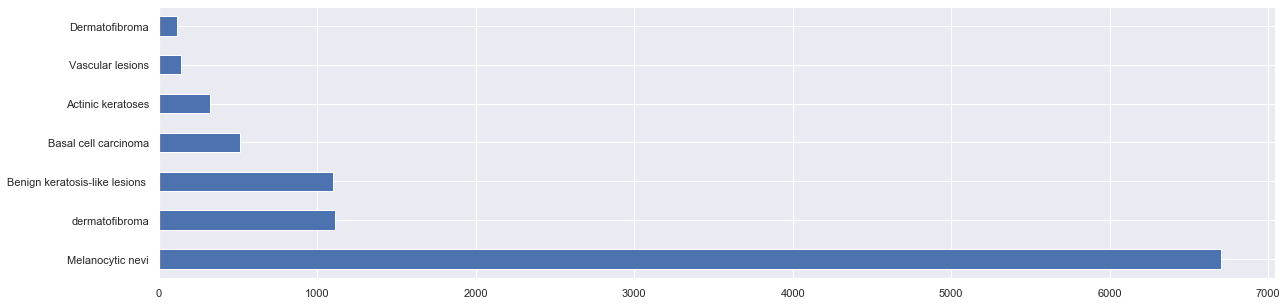

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 5))
tile_df1['cell_type'].value_counts().plot.barh()

Age Distribution (original dataset)

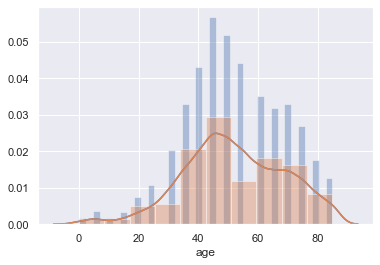

In [4]:
#Excel file-show statistical information for dataset (Age Distribution)

df = pd.read_csv('HAM10000_metadata_original.csv')
#df = sns.load_csv('HAM10000_metadata.csv')

# Make default histogram of age
sns.distplot( df["age"] )
#sns.plt.show()

# Control the number of bins
sns.distplot( df["age"], bins=10 )
#sns.plt.show()

## <font color="#000000">Data Preprocessing</font>
<div class="alert alert-block alert-info"><font color="#000000">
There are seven categories of skin conditions, however for this analysis we are interested in the ability to identify the differences between a common mole and a cancerous cell.  These skin conditions are referred to as the melanocytic nevi (mole) and the basal cell carcinoma (cancerous cell).  Let's take a look at these categories:
<font><div>

In [5]:
#Metadata information
tile_df2.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,7219,7219,7219,7219,7219,7219,0,7219
unique,5730,7219,2,3,3,15,0,2
top,HAM_0005263,ISIC_0033512,nv,follow_up,male,back,NaN,Melanocytic nevi
freq,6,1,6705,3704,3738,1613,NaN,6705


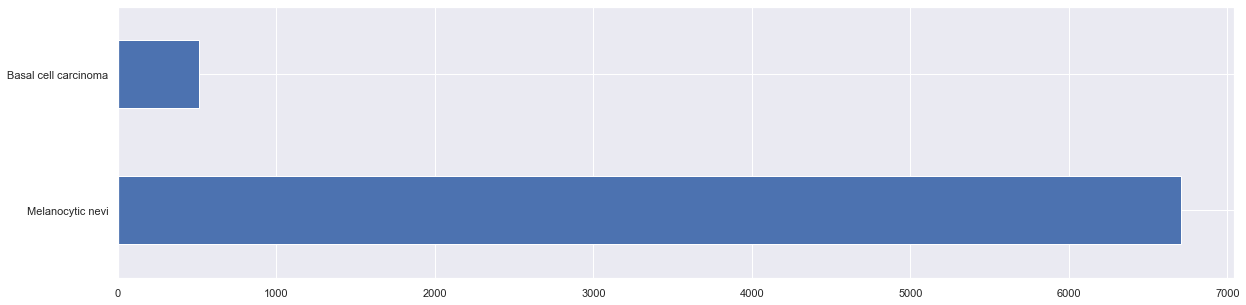

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 5))
tile_df2['cell_type'].value_counts().plot.barh()

The new dataset includes 6,705 melanocytic nevi images, and 514 basal cell carcinoma images.  In order to test this dataset for greater accuracy, we need to include more basal cell carinoma images. 

## <font color="#000000">Image Data Preprocessing</font>
<div class="alert alert-block alert-info"><font color="#000000">
The original dataset file size was in excess of 2Gb with images sized at 650 x 450 x 300dpi.  By closely examining the dataset, there are several advantages of resizing the images:

    
-Some of the images contain camera lens boundaries (which are black in the image), which will decrease the testing accuracy. 
    
-The large file size requires a higher level of processing time.
    
The new file sizes are standardized and cropped to 90 x 90 x 300 dpi.
    
In addition, we are able to increase the quantity of basal cell carcinoma files from the original 514 images.  With the process of rotating (90, 180, and 270 degrees) and mirrowing these images (rotating a second time), we are able to test a total of 4,112 images, which will provide a higher testing accuracy.
<font><div>

<img src='02Content/DataPreProcessing_diagram.jpg' width=1000px>

## <font color="#000000">The Dataset used for Machine Learning</font>
<div class="alert alert-block alert-info"><font color="#000000">
The final dataset that will be used contains the following information:
<font><div>

In [7]:
#Metadata information
tile_df3.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,orientation,path,cell_type
count,10817,10817,10817,10817,10817,10817,10817,0,10817
unique,5730,10817,2,3,3,15,9,0,2
top,HAM_0004621,nv3125,nv,histo,male,back,original,NaN,Melanocytic nevi
freq,32,1,6705,6610,5957,2915,6705,NaN,6705


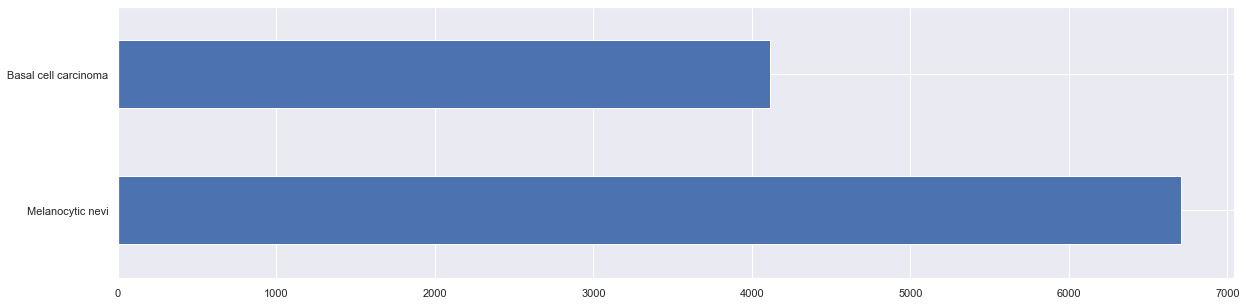

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 5))
tile_df3['cell_type'].value_counts().plot.barh()

This proportion of images for testing accuracy is much better.

In [9]:
#Self-check, remove for final
tile_df3['path']

0        None
1        None
2        None
3        None
4        None
         ... 
10812    None
10813    None
10814    None
10815    None
10816    None
Name: path, Length: 10817, dtype: object

## <font color="#000000">Choosing the machine learning platform and tuning the Convolutional Neural Network</font>
<div class="alert alert-block alert-info"><font color="#000000">
This process includes testing different layers and features from the prescribed CNN.  In this project, we are using Tensorflow and Keras, and assigning various layers in Keras to determine which model can most accurately predict the differences between these two skin cells.
<font><div>

In [4]:
#Import libraries and testing with Tensorflow
import tensorflow as tf   # Import tensorflow (Keras included)
import os
import cv2

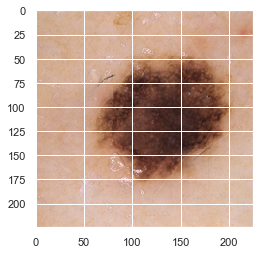

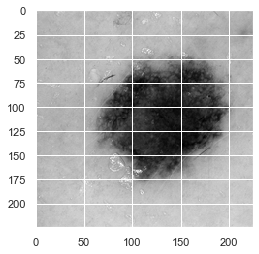

In [5]:
#Show color and resampled image in grayscale
img = cv2.imread('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis/images/nv/nv0009.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.imread('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis/images/nv/nv0009.jpg', cv2.IMREAD_GRAYSCALE)
IMSIZE = 225
new_array = cv2.resize(img, (IMSIZE, IMSIZE))
plt.imshow(new_array, cmap='gray')

In [6]:
#Create training data from images, this will take some time depending on size of data
training_data = []

def create_training_data():
    for category in ['bcc', 'nv']:
        path = os.path.join('C:/Users/admin/01_Business_Apps_of_ML(X522)/skin_analysis/images', category)
        class_label = {'bcc':0, 'nv':1}[category]
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMSIZE, IMSIZE))
                training_data.append([new_array, class_label])
            except Exception as e:
                pass

create_training_data()  

In [7]:
#Show total quantity of data/images that will be used for analysis
#Shuffle the images randomly for the training data
print(len(training_data))

import random

random.shuffle(training_data)

10817


In [8]:
#Show feature set for data
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMSIZE,IMSIZE,1)
y = np.array(y)

print(X.shape, y.shape)

(10817, 225, 225, 1) (10817,)


In [9]:
#Numpy core array assigned to the dataset for training and test datasets
import pickle
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
#Tensorflow and Keras Convolutional Neural Network with imported layers for image detection 
#Refer to Keras layer information at https://keras.io/api/models/sequential/#sequential-class
#Refer to Keras layer information at https://keras.io/api/layers/core_layers/ 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
import pickle

In [9]:
#Running CNN on assigned layers, training data-no test
tf.random.set_seed(0)

# define a sequential neural network
model = Sequential()

model.add(Flatten()) # Flatten image
model.add(Dense(1000, activation='relu'))# Adds a densely-connected layer with 128 neurons
#model.add(Dense(800, activation='relu')) #Omitted for this test
model.add(Dense(10, activation='softmax')) # Number of neurons Final layer

model.compile(optimizer='adam', #'adam'  #'adamax',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(X,y, epochs=1)

Train on 10817 samples
10817/10817 [==============================] - 65s 6ms/sample - loss: 2797.0415 - accuracy: 0.6545


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  50626000  
_________________________________________________________________
dense_1 (Dense)              multiple                  10010     
Total params: 50,636,010
Trainable params: 50,636,010
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 10% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu')) #ReLU - rectified linear unit, computationally effiecient
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=2, validation_split=0.1)

Train on 9735 samples, validate on 1082 samples
Epoch 1/2
9735/9735 [==============================] - 342s 35ms/sample - loss: 3.7100 - accuracy: 0.7408 - val_loss: 0.5221 - val_accuracy: 0.7532
Epoch 2/2
9735/9735 [==============================] - 387s 40ms/sample - loss: 0.4104 - accuracy: 0.8180 - val_loss: 0.4033 - val_accuracy: 0.8087


In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 223, 223, 64)      640       
_________________________________________________________________
activation_6 (Activation)    (None, 223, 223, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 788544)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50466880  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                

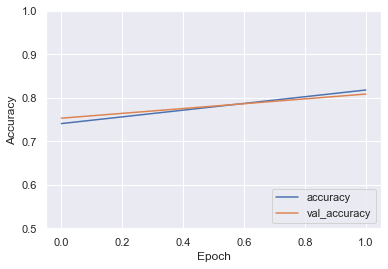

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 20% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu')) #ReLU - rectified linear unit, computationally effiecient
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=2, validation_split=0.2)

Train on 8653 samples, validate on 2164 samples
Epoch 1/2
8653/8653 [==============================] - 268s 31ms/sample - loss: 5.4287 - accuracy: 0.7276 - val_loss: 0.4411 - val_accuracy: 0.8078
Epoch 2/2
8653/8653 [==============================] - 268s 31ms/sample - loss: 0.4069 - accuracy: 0.8159 - val_loss: 0.4491 - val_accuracy: 0.7754


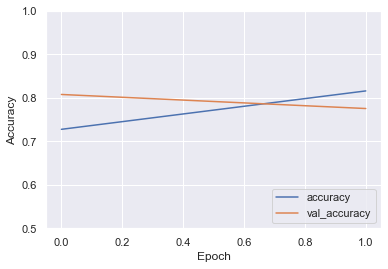

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 20% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000))
#model.add(Dense(32))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=2, validation_split=0.2)

Train on 8653 samples, validate on 2164 samples
Epoch 1/2
8653/8653 [==============================] - 1394s 161ms/sample - loss: 6.7887 - accuracy: 0.7474 - val_loss: 0.4634 - val_accuracy: 0.7893
Epoch 2/2
8653/8653 [==============================] - 1344s 155ms/sample - loss: 0.3990 - accuracy: 0.8245 - val_loss: 0.4598 - val_accuracy: 0.8156


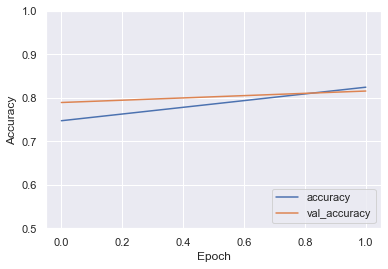

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 20% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000))
model.add(Dense(500))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=2, validation_split=0.2)

Train on 8653 samples, validate on 2164 samples
Epoch 1/2
8653/8653 [==============================] - 1351s 156ms/sample - loss: 11.3755 - accuracy: 0.6905 - val_loss: 0.4543 - val_accuracy: 0.8027
Epoch 2/2
8653/8653 [==============================] - 1331s 154ms/sample - loss: 0.4402 - accuracy: 0.8049 - val_loss: 0.4564 - val_accuracy: 0.8031


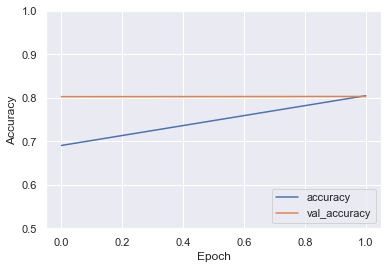

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
#Final Model test, chose model 2, now running 10 epochs
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 20% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500))
#model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=2, validation_split=0.2)

Train on 8653 samples, validate on 2164 samples
Epoch 1/2
8653/8653 [==============================] - 737s 85ms/sample - loss: 7.8275 - accuracy: 0.7219 - val_loss: 0.5086 - val_accuracy: 0.7320
Epoch 2/2
8653/8653 [==============================] - 728s 84ms/sample - loss: 0.4469 - accuracy: 0.8069 - val_loss: 0.4266 - val_accuracy: 0.8041


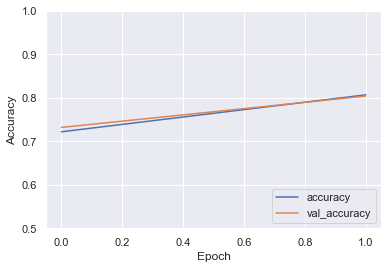

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
#Modifying layers to test accuracy on different assigned layers
#Add validation parameter, currently assigned to 20% of images
x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = x/225.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(225,225,1)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000))
#model.add(Dense(32))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model.fit(X,y, epochs=10, validation_split=0.2)

Train on 8653 samples, validate on 2164 samples
Epoch 1/10
8653/8653 [==============================] - 1353s 156ms/sample - loss: 22.9174 - accuracy: 0.6845 - val_loss: 0.4868 - val_accuracy: 0.7717
Epoch 2/10
8653/8653 [==============================] - 1329s 154ms/sample - loss: 0.4605 - accuracy: 0.7943 - val_loss: 0.4902 - val_accuracy: 0.7879
Epoch 3/10
8653/8653 [==============================] - 1343s 155ms/sample - loss: 0.4104 - accuracy: 0.8193 - val_loss: 0.4831 - val_accuracy: 0.8119
Epoch 4/10
8653/8653 [==============================] - 1352s 156ms/sample - loss: 0.3609 - accuracy: 0.8436 - val_loss: 0.5081 - val_accuracy: 0.7505
Epoch 5/10
8653/8653 [==============================] - 1300s 150ms/sample - loss: 0.3224 - accuracy: 0.8624 - val_loss: 0.4634 - val_accuracy: 0.8013
Epoch 6/10
8653/8653 [==============================] - 1316s 152ms/sample - loss: 0.2949 - accuracy: 0.8758 - val_loss: 0.4709 - val_accuracy: 0.8189
Epoch 7/10
8653/8653 [=======================

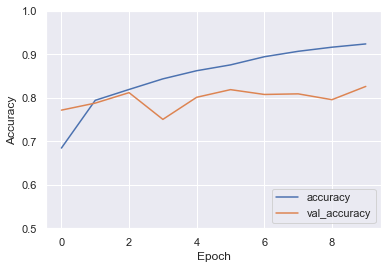

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Results and Conclusion

This project demonstrated the successful process of machine learning, while utilizing various algorithms and tuning the hyperparameters.  As variables were modified to increase the performance on a few epochs, analysis was conducted to determine the best machine learning process to test ten epochs to determine the test accuracy.  The final result was 92.15% for the test data. 

The results from this project were highly successful, however there is room for improvement to utilize different methodologies and algorithms to increase the accuracy rating.  In addition, more substantial processing power would enable the ability to utilize the original high resolution images, as well as increasing the sample size.  This project has a lot of potential for other types of scientific analysis and technology applications, as well as the ability to integrate this type of machine learning into medical devices.

This project was originally inspired in light of the COVID-19 pandemic, which is a global challenge and being addressed from many different perspectives to contain this virus, reduce the spread, and treat the those that have been infected.  The possibility to obtain various types of samples of images, while considering biological and chemical matter provides the ability to quickly detect and respond to health concerns and conditions.

The CNN for this project demonstrated the ability to analyze the accuracy between conditions that look similar, while providing many opportunities for future healthcare applications.  Machine learning and data science has the ability to offer new insights and innovation into our future.

## References

1. Tschandl, Philipp, 2018, "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions", https://doi.org/10.7910/DVN/DBW86T, Harvard Dataverse, V3, UNF:6:/APKSsDGVDhwPBWzsStU5A== [fileUNF] (online) Available: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
1. Guy, G. P., Jr, Thomas, C. C., Thompson, T., Watson, M., Massetti, G. M., Richardson, L. C., & Centers for Disease Control and Prevention (CDC) (2015). Vital signs: melanoma incidence and mortality trends and projections - United States, 1982-2030. MMWR. Morbidity and mortality weekly report, 64(21), 591–596. 
1. Rogers HW, Weinstock MA, Harris AR, et al. "Incidence Estimate of Nonmelanoma Skin Cancer in the United States", Arch Dermatol. 2010;146(3):283–287. (online) Available: doi:10.1001/archdermatol.2010.19 
1. "Skin Cancer Facts & Statistics - The Skin Cancer Foundation". (2020). (online) Available:  https://www.skincancer.org/skin-cancer-information/skin-cancer-facts/ 
1. "What are basal and squamous cell skin cancers?" American Cancer Society. (online) Available:  http://www.cancer.org/cancer/skincancer-basalandsquamouscell/detailedguide/skin-cancer-basal-and-squamous-cell-what-is-basal-and-squamous-cell. 
1.  "Medical Expenditure Panel Survey", Agency for Healthcare Research and Quality, 2022. Rockville, MD: Agency for Healthcare Research and Quality; [January 2014]. (online) Available:  https://www.ahrq.gov/data/meps.html
1. James, S., Abate, D., Abate, K., Abay, S., Abbafati, C., Abbasi, N. et al. (2018). "Global, regional, and national incidence, prevalence, and years lived with disability for 354 diseases and injuries for 195 countries and territories, 1990–2017: a systematic analysis for the Global Burden of Disease Study 2017", The Lancet, 392(10159), 1789-1858. doi: 10.1016/S0140-6736(18)32279-7
1. "Moles: Signs and symptoms", American Academy of Dermatology Association, 2022. (online) Available:  https://www.aad.org/public/diseases/a-z/moles-symptoms
1. "Basal Cell Carcinoma: Overview", American Academy of Dermatology Association, 2022. (online) Available: https://www.aad.org/public/diseases/skin-cancer/types/common/bcc

## Addendum
<img src="02content/addendum.bmp" width="800" align="center"/>

*Table: Global prevalence, incidence, and YLDs for 2017; percentage change of YLD counts; and percentage change of age-standardized YLD rates for 1990–2007 and 2007–17 for both sexes combined for all Level 5 causes, nature of injury aggregates, and nine impairments (abbreviated content)*$^6$

Keywords: applications, algorithms, analytics, convolutional neural network (CNN), data science, databases, data processing, dataset, deep learning, dermatology, digital health, health information, image processing, machine learning, model tuning, python, skin cancer, skin cells, skin conditions, tensorflow.  

# Attribution-NonCommercial-ShareAlike 4.0 International

Creative Commons Corporation ("Creative Commons") is not a law firm and does not provide legal services or legal advice. Distribution of Creative Commons public licenses does not create a lawyer-client or other relationship. Creative Commons makes its licenses and related information available on an "as-is" basis. Creative Commons gives no warranties regarding its licenses, any material licensed under their terms and conditions, or any related information. Creative Commons disclaims all liability for damages resulting from their use to the fullest extent possible.

Using Creative Commons Public Licenses

Creative Commons public licenses provide a standard set of terms and conditions that creators and other rights holders may use to share original works of authorship and other material subject to copyright and certain other rights specified in the public license below. The following considerations are for informational purposes only, are not exhaustive, and do not form part of our licenses.

Considerations for licensors: Our public licenses are intended for use by those authorized to give the public permission to use material in ways otherwise restricted by copyright and certain other rights. Our licenses are irrevocable. Licensors should read and understand the terms and conditions of the license they choose before applying it.  Licensors should also secure all rights necessary before applying our licenses so that the public can reuse the material as expected. Licensors should clearly mark any material not subject to the license. This includes other CC-licensed material, or material used under an exception or limitation to copyright. More considerations for licensors:
wiki.creativecommons.org/Considerations_for_licensors

Considerations for the public: By using one of our public licenses, a licensor grants the public permission to use the licensed material under specified terms and conditions. If the licensor's permission is not necessary for any reason—for example, because of any applicable exception or limitation to copyright--then that use is not regulated by the license. Our licenses grant only permissions under copyright and certain other rights that a licensor has authority to grant. Use of the licensed material may still be restricted for other reasons, including because others have copyright or other rights in the material. A licensor may make special requests, such as asking that all changes be marked or described. Although not required by our licenses, you are encouraged to respect those requests where reasonable. More considerations for the public:
wiki.creativecommons.org/Considerations_for_licensees

=======================================================================

Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License

By exercising the Licensed Rights (defined below), You accept and agree to be bound by the terms and conditions of this Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License ("Public License"). To the extent this Public License may be interpreted as a contract, You are granted the Licensed Rights in consideration of Your acceptance of these terms and conditions, and the Licensor grants You such rights in consideration of benefits the Licensor receives from making the Licensed Material available under these terms and conditions.

Section 1 -- Definitions.

  a. Adapted Material means material subject to Copyright and Similar Rights that is derived from or based upon the Licensed Material and in which the Licensed Material is translated, altered, arranged, transformed, or otherwise modified in a manner requiring permission under the Copyright and Similar Rights held by the Licensor. For purposes of this Public License, where the Licensed Material is a musical work, performance, or sound recording, Adapted Material is always produced where the Licensed Material is synced in timed relation with a moving image.

  b. Adapter's License means the license You apply to Your Copyright and Similar Rights in Your contributions to Adapted Material in accordance with the terms and conditions of this Public License.

  c. BY-NC-SA Compatible License means a license listed at creativecommons.org/compatiblelicenses, approved by Creative Commons as essentially the equivalent of this Public License.

  d. Copyright and Similar Rights means copyright and/or similar rights closely related to copyright including, without limitation, performance, broadcast, sound recording, and Sui Generis Database Rights, without regard to how the rights are labeled or categorized. For purposes of this Public License, the rights specified in Section 2(b)(1)-(2) are not Copyright and Similar Rights.

  e. Effective Technological Measures means those measures that, in the absence of proper authority, may not be circumvented under laws fulfilling obligations under Article 11 of the WIPO Copyright Treaty adopted on December 20, 1996, and/or similar international agreements.

  f. Exceptions and Limitations means fair use, fair dealing, and/or any other exception or limitation to Copyright and Similar Rights that applies to Your use of the Licensed Material.

  g. License Elements means the license attributes listed in the name of a Creative Commons Public License. The License Elements of this Public License are Attribution, NonCommercial, and ShareAlike.

  h. Licensed Material means the artistic or literary work, database, other material to which the Licensor applied this Public License.

  i. Licensed Rights means the rights granted to You subject to the terms and conditions of this Public License, which are limited to all Copyright and Similar Rights that apply to Your use of the Licensed Material and that the Licensor has authority to license.

  j. Licensor means the individual(s) or entity(ies) granting rights under this Public License.

  k. NonCommercial means not primarily intended for or directed towards commercial advantage or monetary compensation. For purposes of this Public License, the exchange of the Licensed Material for other material subject to Copyright and Similar Rights by digital file-sharing or similar means is NonCommercial provided there is no payment of monetary compensation in connection with the exchange.

  l. Share means to provide material to the public by any means or process that requires permission under the Licensed Rights, such as reproduction, public display, public performance, distribution, dissemination, communication, or importation, and to make material available to the public including in ways that members of the may access the material from a place and at a time individually chosen by them.

  m. Sui Generis Database Rights means rights other than copyright resulting from Directive 96/9/EC of the European Parliament and of the Council of 11 March 1996 on the legal protection of databases, as amended and/or succeeded, as well as other essentially equivalent rights anywhere in the world.

  n. You means the individual or entity exercising the Licensed Rights under this Public License. Your has a corresponding meaning.

Section 2 -- Scope.

  a. License grant.
      1. Subject to the terms and conditions of this Public License, Licensor hereby grants You a worldwide, royalty-free, non-sublicensable, non-exclusive, irrevocable license to exercise the Licensed Rights in the Licensed Material to:
        a. reproduce and Share the Licensed Material, in whole or in part, for NonCommercial purposes only; and
        b. produce, reproduce, and Share Adapted Material for NonCommercial purposes only.
      2. Exceptions and Limitations. For the avoidance of doubt, where Exceptions and Limitations apply to Your use, this Public License does not apply, and You do not need to comply with its terms and conditions.
      3. Term. The term of this Public License is specified in Section 6(a).
      4. Media and formats; technical modifications allowed. The Licensor authorizes You to exercise the Licensed Rights in all media and formats whether now known or hereafter created, to make technical modifications necessary to do so. The Licensor waives and/or agrees not to assert any right or authority to forbid You from making technical modifications necessary to exercise the Licensed Rights, including technical modifications necessary to circumvent Effective Technological Measures. For purposes of this Public License, making modifications authorized by this Section 2(a) (4) never produces Adapted Material.
      5. Downstream recipients.
        a. Offer from the Licensor -- Licensed Material. Every recipient of the Licensed Material automatically receives an offer from the Licensor to exercise the Licensed Rights under the terms and conditions of this Public License.
        b. Additional offer from the Licensor -- Adapted Material.  Every recipient of Adapted Material from You automatically receives an offer from the Licensor to exercise the Licensed Rights in the Adapted Material under the conditions of the Adapter's License You apply.
        c. No downstream restrictions. You may not offer or impose any additional or different terms or conditions on, or apply any Effective Technological Measures to, the Licensed Material if doing so restricts exercise of the Licensed Rights by any recipient of the Licensed Material.
      6. No endorsement. Nothing in this Public License constitutes or may be construed as permission to assert or imply that You are, or that Your use of the Licensed Material is, connected with, or sponsored, endorsed, or granted official status by, Licensor or others designated to receive attribution as provided in Section 3(a)(1)(A)(i).

  b. Other rights.
      1. Moral rights, such as the right of integrity, are not licensed under this Public License, nor are publicity, privacy, and/or other similar personality rights; however, to the extent possible, the Licensor waives and/or agrees not to assert any such rights held by the Licensor to the limited extent necessary to allow You to exercise the Licensed Rights, but not otherwise.
      2. Patent and trademark rights are not licensed under this Public License.
      3. To the extent possible, the Licensor waives any right to collect royalties from You for the exercise of the Licensed Rights, whether directly or through a collecting society under any voluntary or waivable statutory or compulsory licensing scheme. In all other cases the Licensor expressly reserves any right to collect such royalties, including when the Licensed Material is used other than for NonCommercial purposes.

Section 3 -- License Conditions.

Your exercise of the Licensed Rights is expressly made subject to the following conditions.

  a. Attribution.
      1. If You Share the Licensed Material (including in modified form), You must:
          a. retain the following if it is supplied by the Licensor with the Licensed Material:
             i. identification of the creator(s) of the Licensed Material and any others designated to receive                     attribution, in any reasonable manner requested by the Licensor (including by pseudonym if designated);
             ii. a copyright notice;
             iii. a notice that refers to this Public License;
             iv. a notice that refers to the disclaimer of warranties;
             v. a URI or hyperlink to the Licensed Material to the extent reasonably practicable;
          b. indicate if You modified the Licensed Material and retain an indication of any previous modifications; and
          c. indicate the Licensed Material is licensed under this Public License, and include the text of, or the URI or hyperlink to, this Public License.
      2. You may satisfy the conditions in Section 3(a)(1) in any reasonable manner based on the medium, means, and context in which You Share the Licensed Material. For example, it may be reasonable to satisfy the conditions by providing a URI or hyperlink to a resource that includes the required           information.
      3. If requested by the Licensor, You must remove any of the information required by Section 3(a)(1)(A) to the extent reasonably practicable.
          b. ShareAlike.
             In addition to the conditions in Section 3(a), if You Share Adapted Material You produce, the following conditions also apply.
      1. The Adapter's License You apply must be a Creative Commons license with the same License Elements, this version or later, or a BY-NC-SA Compatible License.
      2. You must include the text of, or the URI or hyperlink to, the Adapter's License You apply. You may satisfy this condition in any reasonable manner based on the medium, means, and context in which You Share Adapted Material.
      3. You may not offer or impose any additional or different terms conditions on, or apply any Effective Technological Measures to, Adapted Material that restrict exercise of the rights granted under the Adapter's License You apply.

Section 4 -- Sui Generis Database Rights.

Where the Licensed Rights include Sui Generis Database Rights that apply to Your use of the Licensed Material:

  a. for the avoidance of doubt, Section 2(a)(1) grants You the right to extract, reuse, reproduce, and Share all or a substantial portion of the contents of the database for NonCommercial purposes only;
  b. if You include all or a substantial portion of the database contents in a database in which You have Sui Generis Database Rights, then the database in which You have Sui Generis Database Rights (but not its individual contents) is Adapted Material, including for purposes of Section 3(b); and
  c. You must comply with the conditions in Section 3(a) if You Share or a substantial portion of the contents of the database.

For the avoidance of doubt, this Section 4 supplements and does not replace Your obligations under this Public License where the Licensed Rights include other Copyright and Similar Rights.

Section 5 -- Disclaimer of Warranties and Limitation of Liability.

  a. UNLESS OTHERWISE SEPARATELY UNDERTAKEN BY THE LICENSOR, TO THE EXTENT POSSIBLE, THE LICENSOR OFFERS THE LICENSED MATERIAL AS-IS AND AS-AVAILABLE, AND MAKES NO REPRESENTATIONS OR WARRANTIES OF ANY KIND CONCERNING THE LICENSED MATERIAL, WHETHER EXPRESS, IMPLIED, STATUTORY, OR OTHER. THIS INCLUDES, WITHOUT LIMITATION, WARRANTIES OF TITLE, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT, ABSENCE OF LATENT OR OTHER DEFECTS, ACCURACY, OR THE PRESENCE OR ABSENCE OF ERRORS, WHETHER OR NOT KNOWN OR DISCOVERABLE. WHERE DISCLAIMERS OF WARRANTIES ARE NOT ALLOWED IN FULL OR IN PART, THIS DISCLAIMER MAY NOT APPLY TO YOU.
  b. TO THE EXTENT POSSIBLE, IN NO EVENT WILL THE LICENSOR BE LIABLE TO YOU ON ANY LEGAL THEORY (INCLUDING, WITHOUT LIMITATION, NEGLIGENCE) OR OTHERWISE FOR ANY DIRECT, SPECIAL, INDIRECT, INCIDENTAL, CONSEQUENTIAL, PUNITIVE, EXEMPLARY, OR OTHER LOSSES, COSTS, EXPENSES, OR DAMAGES ARISING OUT OF THIS PUBLIC LICENSE OR USE OF THE LICENSED MATERIAL, EVEN IF THE LICENSOR HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH LOSSES, COSTS, EXPENSES, OR DAMAGES. WHERE A LIMITATION OF LIABILITY IS NOT ALLOWED IN FULL OR IN PART, THIS LIMITATION MAY NOT APPLY TO YOU.
  c. The disclaimer of warranties and limitation of liability provided above shall be interpreted in a manner that, to the extent possible, most closely approximates an absolute disclaimer and waiver of all liability.

Section 6 -- Term and Termination.

  a. This Public License applies for the term of the Copyright and Similar Rights licensed here. However, if You fail to comply with this Public License, then Your rights under this Public License terminate automatically.
  b. Where Your right to use the Licensed Material has terminated under Section 6(a), it reinstates:
    1. automatically as of the date the violation is cured, provided it is cured within 30 days of Your discovery of the violation; or
    2. upon express reinstatement by the Licensor.
       For the avoidance of doubt, this Section 6(b) does not affect any right the Licensor may have to seek remedies for Your violations of this Public License.
  c. For the avoidance of doubt, the Licensor may also offer the Licensed Material under separate terms or conditions or stop distributing the Licensed Material at any time; however, doing so will not terminate this Public License.
  d. Sections 1, 5, 6, 7, and 8 survive termination of this Public License.

Section 7 -- Other Terms and Conditions.

  a. The Licensor shall not be bound by any additional or different terms or conditions communicated by You unless expressly agreed.
  b. Any arrangements, understandings, or agreements regarding the Licensed Material not stated herein are separate from and independent of the terms and conditions of this Public License.

Section 8 -- Interpretation.
  a. For the avoidance of doubt, this Public License does not, and shall not be interpreted to, reduce, limit, restrict, or impose conditions on any use of the Licensed Material that could lawfully be made without permission under this Public License.
  b. To the extent possible, if any provision of this Public License is deemed unenforceable, it shall be automatically reformed to the minimum extent necessary to make it enforceable. If the provision      cannot be reformed, it shall be severed from this Public License without affecting the enforceability of the remaining terms and conditions.
  c. No term or condition of this Public License will be waived and no failure to comply consented to unless expressly agreed to by the Licensor.
  d. Nothing in this Public License constitutes or may be interpreted as a limitation upon, or waiver of, any privileges and immunities that apply to the Licensor or You, including from the legal processes of any jurisdiction or authority.

=======================================================================

Creative Commons is not a party to its public licenses. Notwithstanding, Creative Commons may elect to apply one of its public licenses to material it publishes and in those instances will be considered the “Licensor.” The text of the Creative Commons public licenses is dedicated to the public domain under the CC0 Public Domain Dedication. Except for the limited purpose of indicating that material is shared under a Creative Commons public license or as otherwise permitted by the Creative Commons policies published at creativecommons.org/policies, Creative Commons does not authorize the use of the trademark "Creative Commons" or any other trademark or logo of Creative Commons without its prior written consent including, without limitation, in connection with any unauthorized modifications to any of its public licenses or any other arrangements, understandings, or agreements concerning use of licensed material. For the avoidance of doubt, this paragraph does not form part of the public licenses.

This data may also be protected by the California Consumer Privacy Act (CCPA) and other legal restriction depending upon your jurisdiction.

The data is publicly available and shared within the works cited section.  Please download the data for yourself and create meaningful value, while respecting the investment of countless hours, training, education, time, and processes used to develop this publication as a digital product.  Thank you for taking time to read, learn, and hopefully inspiration to contribute towards a better future for all of us.

<img src="02Content/CC-BY-NC-SA-Image.jpg" width="200" align="center"/>